In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
from google.colab import drive

drive.mount('/content/drive')


df=pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [ ]:
df.shape

(5110, 12)

In [ ]:
print (f' We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 target variable.')

 We have 5110 instances with the 11 features and 1 target variable.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [ ]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:

missing_values = df.isnull().sum()

df = df.fillna(df.mean())



print("Missing Values:")
print(missing_values)


Missing Values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<ipython-input-31-8bf99bc25f11>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:

df = df.fillna(df.mean())

missing_values = df.isnull().sum()

print("Missing Values:")
print(missing_values)


Missing Values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<ipython-input-19-21e263e96b7d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
duplicate_count = df.duplicated().sum()

In [ ]:
duplicate_count

0

In [ ]:
X = df[['age', 'avg_glucose_level', 'bmi']]
y = df['stroke']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [ ]:


def knn_predict(train_data, train_labels, test_data, k):
    predictions = []
    for test_point in test_data.values:
        distances = [euclidean_distance(test_point, train_point) for train_point in train_data.values]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [train_labels.iloc[i] for i in k_indices]

        prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
        predictions.append(prediction)

    return predictions

In [ ]:
predictions = knn_predict(X_train, y_train, X_test, k=3)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(accuracy*100)

Accuracy: 0.93
93.24853228962819


In [ ]:
predictions = knn_predict(X_train, y_train, X_test, k=5)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(accuracy*100)

Accuracy: 0.94
93.73776908023484


In [ ]:
predictions = knn_predict(X_train, y_train, X_test, k=7)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(accuracy*100)

Accuracy: 0.94
93.63992172211351


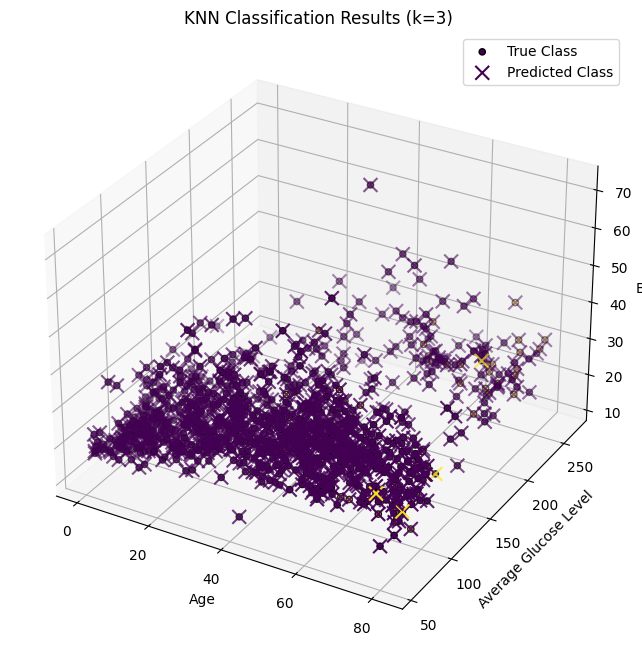

In [ ]:
def plot_3d_scatter(ax, X, y_true, y_pred):
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_true, marker='o', edgecolors='k', label='True Class')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred, marker='x', s=100, label='Predicted Class')
    ax.set_xlabel('Age')
    ax.set_ylabel('Average Glucose Level')
    ax.set_zlabel('BMI')
    ax.legend()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X_test_np = X_test.to_numpy()

plot_3d_scatter(ax, X_test_np, y_test, predictions)

plt.title("KNN Classification Results (k=3)")
plt.show()

In [ ]:

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

def knn_predict_manhattan(train_data, train_labels, test_data, k):
    predictions = []
    for test_point in test_data.values:
        distances = [manhattan_distance(test_point, train_point) for train_point in train_data.values]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [train_labels.iloc[i] for i in k_indices]

        prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
        predictions.append(prediction)

    return predictions

predictions_manhattan = knn_predict_manhattan(X_train, y_train, X_test, k=3)

accuracy_manhattan = accuracy_score(y_test, predictions_manhattan)
print(f'Accuracy (Manhattan): {accuracy_manhattan:.2f}')
print(f'For k = 3 , Accuracy is : {accuracy_manhattan*100}')

predictions_manhattan = knn_predict_manhattan(X_train, y_train, X_test, k=5)

accuracy_manhattan = accuracy_score(y_test, predictions_manhattan)
print(f'Accuracy (Manhattan): {accuracy_manhattan:.2f}')
print(f'For k = 5 , Accuracy is : {accuracy_manhattan*100}')


predictions_manhattan = knn_predict_manhattan(X_train, y_train, X_test, k=7)

accuracy_manhattan = accuracy_score(y_test, predictions_manhattan)
print(f'Accuracy (Manhattan): {accuracy_manhattan:.2f}')
print(f'For k = 7 , Accuracy is : {accuracy_manhattan*100}')



Accuracy (Manhattan): 0.93
For k = 3 , Accuracy is : 92.95499021526419
Accuracy (Manhattan): 0.93
For k = 5 , Accuracy is : 93.44422700587084
Accuracy (Manhattan): 0.94
For k = 7 , Accuracy is : 93.54207436399217
